# US Treasury rates

Here we use the Nasdaq Data Link Python client to get US Treasury data and plot a yield curve. 

For the Black Scholes formula, it is common to take the yield on three-month T-bills as the risk-free rate.

In [89]:
#importing US Treasury rates

import nasdaqdatalink as ndl

ndl.read_key(filename='apikey')

usbond = ndl.get('USTREASURY/YIELD')

In [90]:
usbond.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


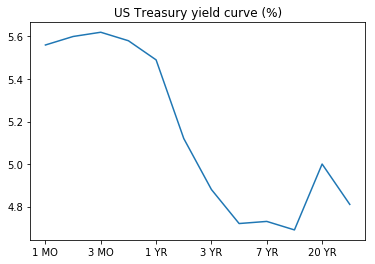

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

today = usbond.iloc[-1,:]

today.plot(title='US Treasury yield curve (%)')

plt.show()

In [167]:
print('The risk-free rate, based on 1-year US Treasury bonds, is {:.2f}%.'.format(today["3 MO"]))

The risk-free rate, based on 1-year US Treasury bonds, is 5.62%.


# Stock data

Now, we will look at real data from Yahoo Finance.

In particular, we will look at our chosen stock and get a feel for how it fluctuates on a day-to-day basis. We will compute the volatility by calculating the standard deviation of log returns.

In [7]:
import yfinance as yf
import datetime
from datetime import timedelta

stock = 'NFLX'
ticker = yf.Ticker(stock)
today = datetime.date.today()

stock_data = ticker.history(interval='1d', start=today-timedelta(days=4*365), end=today)
stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-04 00:00:00-04:00,268.200012,275.480011,266.470001,272.790009,9890400,0.0,0.0
2019-10-07 00:00:00-04:00,271.989990,276.679993,271.279999,274.459991,6525600,0.0,0.0
2019-10-08 00:00:00-04:00,273.029999,275.529999,270.640015,270.720001,6276400,0.0,0.0
2019-10-09 00:00:00-04:00,270.019989,271.000000,264.570007,267.529999,6794400,0.0,0.0
2019-10-10 00:00:00-04:00,265.970001,280.529999,265.029999,280.480011,10809100,0.0,0.0


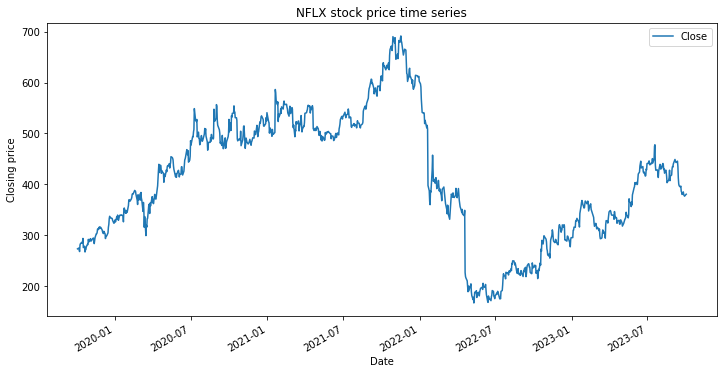

In [8]:
# closing prices

stock_data['Close'].plot(figsize=(12, 6))
plt.title(stock + ' stock price time series')
plt.ylabel('Closing price')
plt.legend()
plt.show()

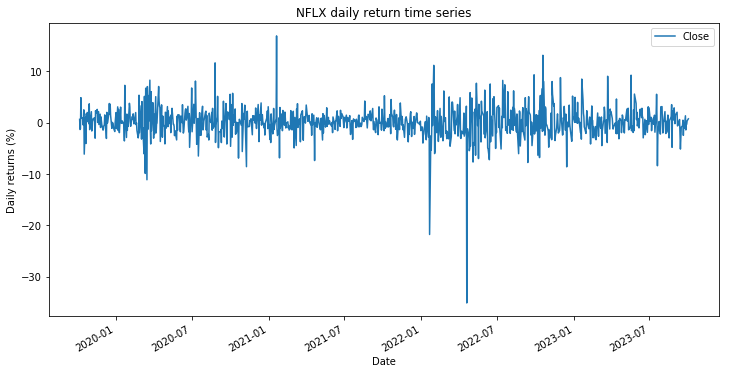

The average daily return is 0.081320%.


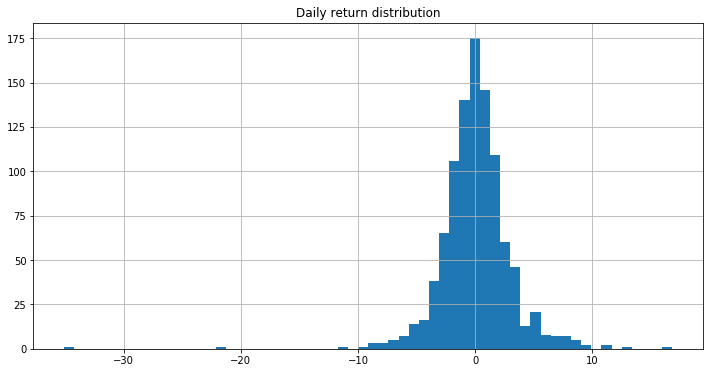

The standard deviation of daily returns is 3.040154%.


In [9]:
# returns distribution

daily_returns = stock_data['Close'].pct_change() # percentage change, expressed as a decimal

(daily_returns*100).plot(figsize=(12, 6))
plt.title(stock + ' daily return time series')
plt.ylabel('Daily returns (%)')
plt.legend()
plt.show()

print('The average daily return is {:.6f}%.'.format(daily_returns.mean()*100))
      
(daily_returns*100).hist(bins=60, figsize=(12, 6))
plt.title('Daily return distribution')
plt.show()

print('The standard deviation of daily returns is {:.6f}%.'.format(daily_returns.std()*100))

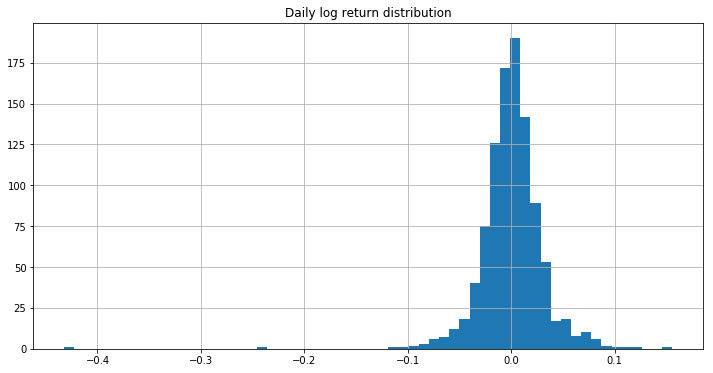

The anualised volatility for NFLX is 0.499744.


In [10]:
# log returns distribution

import numpy as np

daily_log_returns = np.log(daily_returns + 1)
daily_log_returns.hist(bins=60, figsize=(12, 6))
plt.title('Daily log return distribution')
plt.show()

# compute the annualised volatility
volatility = daily_log_returns.std() * 252**0.5 # 252 trading days in a year
print('The anualised volatility for {} is {:.6f}.'.format(volatility))

In [12]:
# current price of the stock

current_price = ticker.info['currentPrice']
print('The current price of {} is {:.4f}.'.format(stock, current_price))

The current price of NFLX is 380.3300.


# Option data

The Yahoo Finance API can also be used to download option data.

In [13]:
# get all option expiry dates

expiry_dates = ticker.options
expiry_dates

('2023-10-06',
 '2023-10-13',
 '2023-10-20',
 '2023-10-27',
 '2023-11-03',
 '2023-11-10',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19',
 '2026-01-16')

In [60]:
# list options with a chosen expiry

expiry = expiry_dates[7]
print('The option expiry date is {}.'.format(expiry))

# an option chain is a list of all available option contracts on a given asset
options = ticker.option_chain(date=expiry)

The option expiry date is 2023-12-15.


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NFLX231215C00160000,2023-09-15 19:07:47+00:00,160.0,239.10,0.00,0.00,0.0,0.0,NaN,2,0.000010,True,REGULAR,USD
1,NFLX231215C00170000,2023-07-21 19:16:45+00:00,170.0,258.00,235.65,239.70,0.0,0.0,2.0,2,2.193486,True,REGULAR,USD
2,NFLX231215C00180000,2023-07-20 16:26:47+00:00,180.0,256.65,225.80,230.35,0.0,0.0,NaN,3,2.081975,True,REGULAR,USD
3,NFLX231215C00200000,2023-08-17 16:42:23+00:00,200.0,212.50,198.05,201.85,0.0,0.0,1.0,19,1.605043,True,REGULAR,USD
4,NFLX231215C00210000,2023-05-24 16:37:53+00:00,210.0,159.90,218.85,222.30,0.0,0.0,NaN,1,2.359135,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NFLX231215C00830000,2023-08-29 17:27:52+00:00,830.0,0.09,0.00,0.07,0.0,0.0,4.0,30,0.554692,False,REGULAR,USD
124,NFLX231215C00835000,2023-07-20 14:11:05+00:00,835.0,0.31,0.04,0.14,0.0,0.0,6.0,7,0.607426,False,REGULAR,USD
125,NFLX231215C00840000,2023-08-14 14:46:52+00:00,840.0,0.15,0.01,0.09,0.0,0.0,1.0,201,0.580082,False,REGULAR,USD
126,NFLX231215C00845000,2023-08-03 13:56:35+00:00,845.0,0.23,0.05,0.14,0.0,0.0,3.0,25,0.618168,False,REGULAR,USD


In [64]:
# sort by volume
options.calls.sort_values(by=['volume'], ascending=False).head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
15,NFLX231215C00275000,2023-09-29 19:40:08+00:00,275.0,107.16,0.0,0.0,0.0,0.0,370.0,199,0.000010,True,REGULAR,USD
25,NFLX231215C00325000,2023-09-26 19:34:43+00:00,325.0,65.04,0.0,0.0,0.0,0.0,351.0,243,0.000010,True,REGULAR,USD
30,NFLX231215C00350000,2023-10-02 19:17:14+00:00,350.0,46.35,0.0,0.0,0.0,0.0,140.0,423,0.000010,True,REGULAR,USD
45,NFLX231215C00425000,2023-10-02 19:17:22+00:00,425.0,11.05,0.0,0.0,0.0,0.0,136.0,758,0.062509,False,REGULAR,USD
37,NFLX231215C00385000,2023-10-02 19:54:40+00:00,385.0,25.80,0.0,0.0,0.0,0.0,110.0,257,0.007822,False,REGULAR,USD


In [193]:
import pandas as pd

option = options.calls.iloc[15]
purchase_date = option.lastTradeDate
time_to_maturity = pd.Timestamp(expiry + ' 16:00:00', tz='EST') - purchase_date.tz_convert(tz='EST')

print('Call option {}, last traded on {}, with strike {} and expiry {}, sold for {}.'.format(
    option.contractSymbol,
    purchase_date,
    option.strike,
    expiry,
    option.lastPrice,
    stock
))

print('Time to maturity: ', time_to_maturity)

Call option NFLX231215C00275000, last traded on 2023-09-29 19:40:08+00:00, with strike 275.0 and expiry 2023-12-15, sold for 107.16.
Time to maturity:  77 days 01:19:52


In [194]:
# stock price when the option was traded

minute_data = ticker.history(
    interval='1m', 
    start=purchase_date-timedelta(minutes=1), 
    end=purchase_date+timedelta(minutes=5)
)

stock_price = minute_data.iloc[1].Close
print('When the option was last purchased, the stock price was {:.2f}.'.format(stock_price))

minute_data

When the option was last purchased, the stock price was 376.49.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-29 15:40:00-04:00,376.829987,376.885010,376.714996,376.809998,0,0.0,0.0
2023-09-29 15:41:00-04:00,376.820007,376.859985,376.487488,376.487488,4037,0.0,0.0
2023-09-29 15:42:00-04:00,376.494995,376.600006,376.359985,376.510010,6781,0.0,0.0
2023-09-29 15:43:00-04:00,376.450012,376.649994,376.290009,376.399994,10312,0.0,0.0
2023-09-29 15:44:00-04:00,376.519989,376.600006,376.269989,376.394989,5374,0.0,0.0


Was the bond rate much different when the option was purchased? Let's also choose a maturity that matches up with the option.

In [195]:
risk_free_rate = usbond.loc[str(purchase_date.date())]['3 MO']/100

print('The risk-free rate, at time of option purchase, was {:.2f}%.'.format(risk_free_rate*100))

The risk-free rate, at time of option purchase, was 5.55%.


# Testing the Black-Scholes formula

Let us use the numbers attained in this notebook to test the Black-Scholes formula
$$
    C=S\Phi \left( \omega \right) -Ke^{-rT}\Phi \left( \omega -\sigma \sqrt{T}\right),\hspace{10mm}
    \omega =\dfrac{rT+\sigma ^{2}T/2-\ln \left( K/S\right) }{\sigma \sqrt{T}}.
$$

In [196]:
import numpy as np
from scipy.stats import norm

def Black_Scholes(S, sigma, K, T, r):
    omega = (r*T + sigma**2*T/2 - np.log(K/S)) / (sigma*np.sqrt(T))
    return S*norm.cdf(omega) - K*np.exp(-r*T)*norm.cdf(omega - sigma*np.sqrt(T))

C = Black_Scholes(
    S = stock_price,
    sigma = volatility,
    K = option.strike,
    T = time_to_maturity.days/365,
    r = risk_free_rate
)

print('According to the Black-Scholes formula, the no-agbitrage cost of option contract {} on {} was {:.2f}.'
      .format(option.contractSymbol, purchase_date.date(), C))
print('The contract sold for {} while being in the money by {:.2f}.'
      .format(option.lastPrice, stock_price - option.strike))

According to the Black-Scholes formula, the no-agbitrage cost of option contract NFLX231215C00275000 on 2023-09-29 was 107.26.
The contract sold for 107.16 while being in the money by 101.49.
